<a href="https://colab.research.google.com/github/armangupta910/Movie-Recommendor-System/blob/main/Movie_Recommendation_using_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This part is to improve efficieny. not working rn


In [2]:
# import pandas as pd
# import numpy as np
# from sklearn.mixture import GaussianMixture
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import matplotlib.pyplot as plt

# # Load data
# def load_data():
#     ratings = pd.read_csv("ratings.csv")
#     movies = pd.read_csv("movies.csv")
#     tags = pd.read_csv("tags.csv")
#     links = pd.read_csv("links.csv")
#     return ratings, movies, tags, links

# # Content-based filtering
# def content_based_filtering(movies, tags):
#     # Merge movies and tags
#     movie_tags = pd.merge(movies, tags, on='movieId', how='left')
#     # Fill missing values
#     movie_tags['tag'] = movie_tags['tag'].fillna('')
#     # Group tags by movieId
#     movie_tags_grouped = movie_tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x))
#     # Vectorize tags
#     vectorizer = TfidfVectorizer()
#     tag_matrix = vectorizer.fit_transform(movie_tags_grouped)
#     return tag_matrix

# # Collaborative filtering
# def collaborative_filtering(ratings):
#     # Pivot ratings dataframe
#     user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
#     # Fit Gaussian Mixture Model
#     gmm = GaussianMixture(n_components=10, random_state=42)
#     gmm.fit(user_movie_matrix)
#     return gmm

# # Movie recommendation
# def recommend_movies(movie_id, movies, gmm, tag_matrix):
#     # Get movie index
#     movie_index = movies[movies['movieId'] == movie_id].index
#     if len(movie_index) == 0:
#         return None
#     movie_index = movie_index[0]
#     # Calculate cosine similarity between movie tags and all other movies
#     similarities = cosine_similarity(tag_matrix, tag_matrix[movie_index])
#     # Get top 10 similar movies
#     similar_indices = similarities.flatten().argsort()[-11:-1]
#     similar_movies = [(movies['title'][i], similarities[i][0]) for i in similar_indices]
#     return similar_movies

# # Main function
# def main():
#     # Load data
#     ratings, movies, tags, links = load_data()
#     # Content-based filtering
#     tag_matrix = content_based_filtering(movies, tags)
#     # Collaborative filtering
#     gmm = collaborative_filtering(ratings)
#     # Movie recommendation
#     movie_id = 1  # Example movie ID
#     recommended_movies = recommend_movies(movie_id, movies, gmm, tag_matrix)
#     print("Recommended Movies for Movie ID", movie_id)
#     for movie, similarity in recommended_movies:
#         print(movie, "- Similarity:", similarity)

# if __name__ == "__main__":
#     main()


Recommendation Using GMM

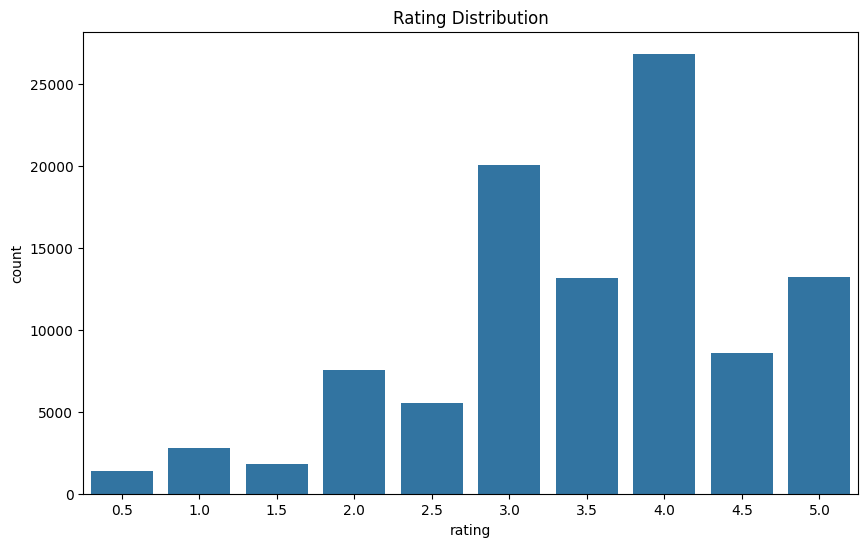

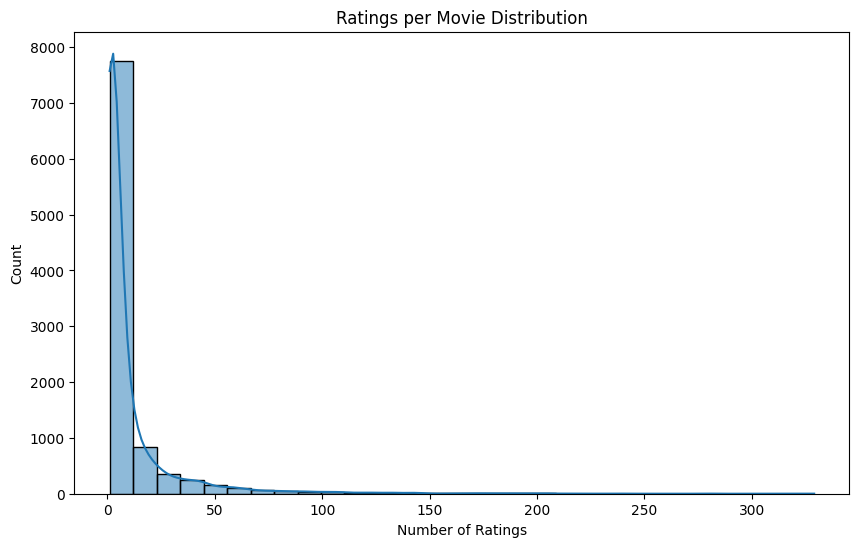

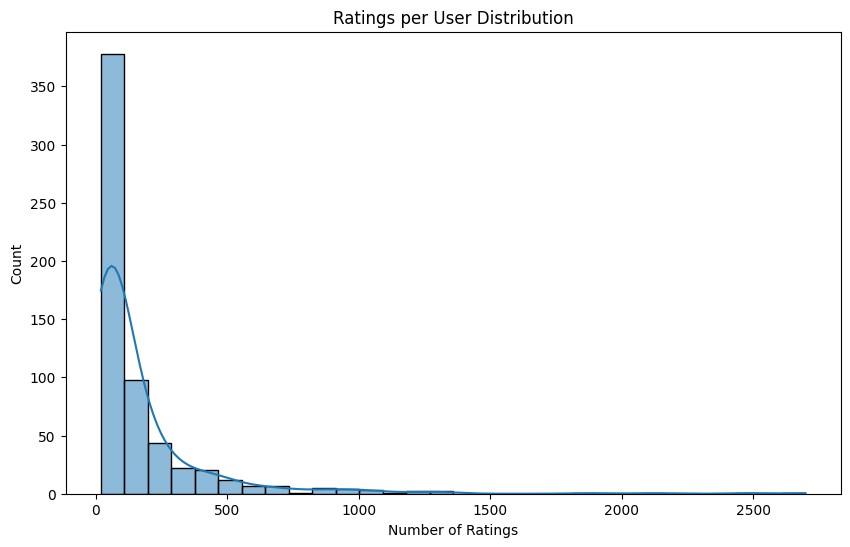

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error

# Data Cleaning and Preprocessing
movies = pd.read_csv('https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/dataSet/movies.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/dataSet/ratings.csv')
tags = pd.read_csv('https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/dataSet/tags.csv')
links = pd.read_csv('https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/dataSet/links.csv')

# Handle missing values
movies.dropna(inplace=True)
ratings.dropna(inplace=True)
tags.dropna(inplace=True)
links.dropna(inplace=True)

# Convert data types if necessary

# Removing duplicates
movies.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)
links.drop_duplicates(inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Rating Distribution')
plt.show()

# Compute number of ratings per movie and user
ratings_per_movie = ratings.groupby('movieId').size()
ratings_per_user = ratings.groupby('userId').size()

# Plot histograms
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title('Ratings per Movie Distribution')
plt.xlabel('Number of Ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title('Ratings per User Distribution')
plt.xlabel('Number of Ratings')
plt.show()



# # Model Evaluation
# train, test = train_test_split(ratings, test_size=0.2, random_state=42)

# # Hyperparameter Tuning
# param_grid = {
#     'n_components': [2, 5, 10, 20],  # Example values for number of components
#     'covariance_type': ['full', 'tied', 'diag', 'spherical']  # Different covariance types
# }

# gmm = GaussianMixture()

# grid_search = GridSearchCV(gmm, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(train[['userId', 'movieId']], train['rating'])

# best_model = grid_search.best_estimator_

# # # Evaluate best model
# # predictions = best_model.predict(test[['userId', 'movieId']])
# # rmse = np.sqrt(mean_squared_error(test['rating'], predictions))
# # print("RMSE:", rmse)

# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)


In [5]:
# Model Training
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

gmm = GaussianMixture(n_components=10, random_state=42)  # Setting the number of components
gmm.fit(train[['userId', 'movieId']])

# Function to recommend movies to a user
def recommend_movies(user_id, model, n_recommendations=5):
    user_movies = ratings[ratings['userId'] == user_id]['movieId'].unique()
    all_movies = ratings['movieId'].unique()
    new_movies = list(set(all_movies) - set(user_movies))
    user_movie_pairs = [[user_id, movie] for movie in new_movies]
    ratings_pred = model.score_samples(user_movie_pairs)
    top_indices = sorted(range(len(ratings_pred)), key=lambda i: ratings_pred[i], reverse=True)[:n_recommendations]
    recommended_movies = [new_movies[i] for i in top_indices]
    return recommended_movies

# Get user input for user ID
user_id = input("Enter your user ID: ")
user_id = int(user_id)  # Convert user input to integer

# Recommending movies to the user
recommendations = recommend_movies(user_id, gmm, n_recommendations=5)

# Displaying recommended movies
print("\nTop 5 Recommended Movies for User", user_id, ":")
for movie_id in recommendations:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print("-", movie_title)


Enter your user ID: 10

Top 5 Recommended Movies for User 10 :
- Cool Hand Luke (1967)
- Cyrano de Bergerac (1990)
- Highlander (1986)
- Young Frankenstein (1974)
- Akira (1988)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


RMSE: 3.3464226756815623
Best Parameters: {'covariance_type': 'full', 'n_components': 5}
RMSE Percentage: 74.36494834847916 %


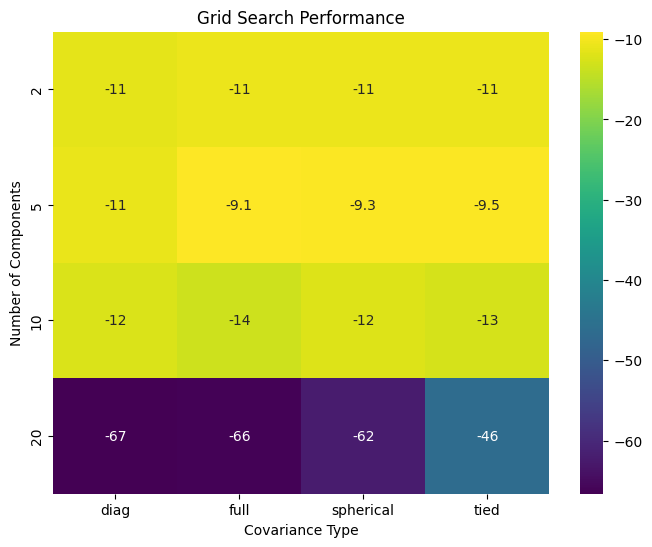

In [6]:
#Model Evaluation
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_components': [2, 5, 10, 20],  # Example values for number of components
    'covariance_type': ['full', 'tied', 'diag', 'spherical']  # Different covariance types
}

gmm = GaussianMixture()

grid_search = GridSearchCV(gmm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train[['userId', 'movieId']], train['rating'])

best_model = grid_search.best_estimator_

# Evaluate best model
predictions = best_model.predict(test[['userId', 'movieId']])
rmse = np.sqrt(mean_squared_error(test['rating'], predictions))
print("RMSE:", rmse)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
rating_range = test['rating'].max() - test['rating'].min()
rmse_percentage = (rmse / rating_range) * 100
# print("RMSE:", rmse)
print("RMSE Percentage:", rmse_percentage, "%")

# Visualize parameter tuning effects (Add after GridSearchCV results)
results_df = pd.DataFrame(grid_search.cv_results_)
performance = results_df.pivot_table(index='param_n_components', columns='param_covariance_type', values='mean_test_score')
plt.figure(figsize=(8, 6))
sns.heatmap(performance, annot=True, cmap='viridis')
plt.title('Grid Search Performance')
plt.xlabel('Covariance Type')
plt.ylabel('Number of Components')
plt.show()

# Plotting RMSE and Confidence Scores Distribution (Add after RMSE calculation and confidence score calculation)
# Assuming confidence_scores_percentage calculated as mentioned in your request





Confidence Scores (in percentage): [69.84822564 99.99951477 99.99679329 ... 99.99217332 99.99902582
 99.99912368]


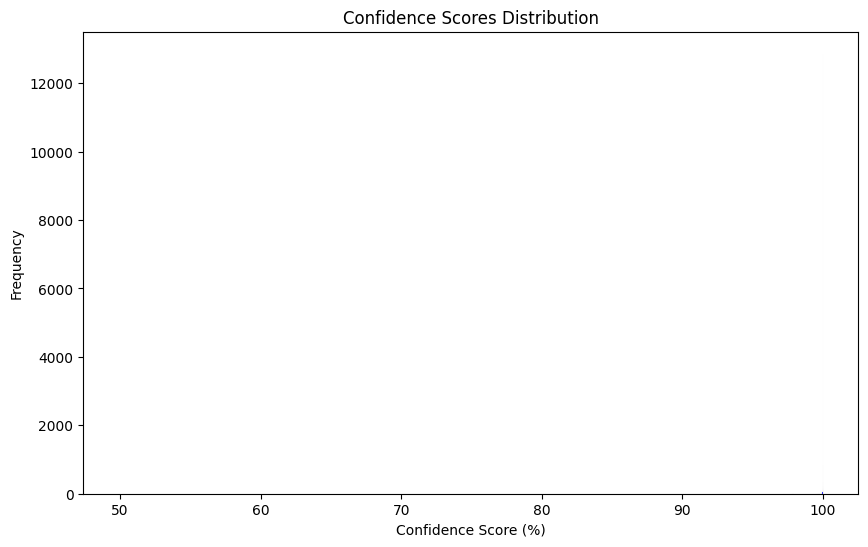

In [7]:
# Get the probabilities assigned to each rating by the model
probabilities = best_model.predict_proba(test[['userId', 'movieId']])

# Calculate the confidence score for each prediction
# confidence_scores = np.max(probabilities, axis=1)
confidence_scores_percentage = np.max(probabilities, axis=1) * 100

# Print the confidence scores
# print("Confidence Scores:", confidence_scores)
print("Confidence Scores (in percentage):", confidence_scores_percentage)

